<a href="https://colab.research.google.com/github/Arona416/-_2_-/blob/main/barry_maxdi_noury.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Барри_Арона, Аоб Махди,Нури Нур**


**Самарский Государсвенный Университет **





![Альтернативный текст](https://samgtu.ru/uploads/redactor/5aa2d64b17b1d.png)
**МИНИСТЕРСТВО ОБРАЗОВАНИЯ И НАУКИ РОССИЙСКОЙ ФЕДЕРАЦИИ**

Федеральное государственное бюджетное образовательное учреждение высшего образования

### САМАРСКИЙ ГОСУДАРСТВЕННЫЙ ТЕХНИЧЕСКИЙ УНИВЕРСИТЕТ

Институт автоматики и информационных технологий
Кафедра «Информационные технологии»

# **ОТЧЕТ**
о выполнении лабораторной работы №5

*по дисциплине "Язык Python дл сложных задач"*

*Преподаватель Гавлиевский С.Л.*

*Студент 1-ИАИТ-103М Барри Арона.*
*Студент 1-ИАИТ-103М Аоб Махди.*
*Студент 1-ИАИТ-103М Нури Нур.*


**Самара 2025**



1 — Анализ шумового сигнала (NumPy + Pandas + Matplotlib)
Задание

Создать шумовой синусоидальный сигнал длиной 1000.

Поместить данные в DataFrame с колонками:

time

signal

Добавить колонку smoothed — скользящее среднее на 20 точек.

Построить график «сырой сигнал vs сглаженный»

2 — Корреляции + тепловая карта
Задание

Сгенерировать набор данных (500 строк):

age: от 18 до 65

salary: зависит от возраста

score: нормальное распределение

Создать DataFrame.

Вычислить корреляции.

Построить тепловую карту (heatmap).
3 — GroupBy + статистика + 4 графика
Задание

Сгенерировать данные о продажах:

12 месяцев

4 продукта: A, B, C, D

продажи: случайные величины 100–1000

Создать DataFrame.

Для каждого продукта вычислить:

среднее значение

максимум

стандартное отклонение

Построить 4 отдельных графика — по одному для каждого продукта.

In [5]:
# === УПРАЖНЕНИЕ 1 ===

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
 #Генерация шумового сигнала
np.random.seed(0)
time = np.linspace(0, 10, 1000)
signal = np.sin(2 * np.pi * time) + 0.3 * np.random.randn(1000)


In [11]:
# 2) DataFrame
df = pd.DataFrame({
    "time": time,
    "signal": signal
})


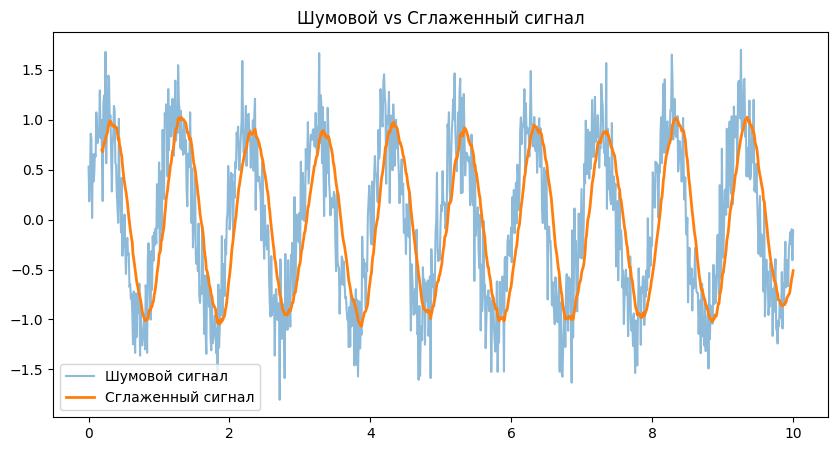

,time,signal,smoothed
0,0.00000,0.529216,NaN
1,0.01001,0.182900,NaN
2,0.02002,0.419079,NaN
3,0.03003,0.859835,NaN
4,0.04004,0.809201,NaN


In [12]:
# 3) Скользящее среднее
df["smoothed"] = df["signal"].rolling(window=20).mean()

# 4) Визуализация
plt.figure(figsize=(10,5))
plt.plot(df["time"], df["signal"], label="Шумовой сигнал", alpha=0.5)
plt.plot(df["time"], df["smoothed"], label="Сглаженный сигнал", linewidth=2)
plt.legend()
plt.title("Шумовой vs Сглаженный сигнал")
plt.show()

df.head()

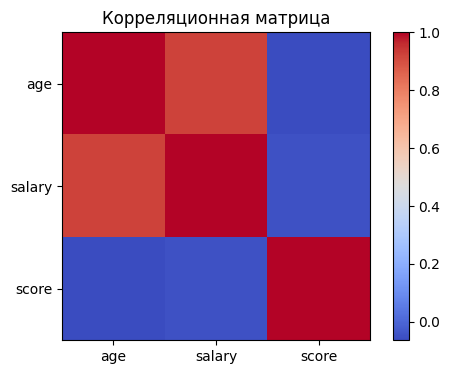

,age,salary,score
0,55,19325.910142,51.484753
1,61,19444.551963,68.201453
2,30,8097.952694,48.518319
3,26,8941.912042,74.661435
4,27,11029.786690,35.373650


In [18]:
# === УПРАЖНЕНИЕ 3 ===

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(4)

months = np.arange(1, 13)
products = ["A", "B", "C", "D"]

In [19]:
# 1) Генерация данных
data = []
for p in products:
    sales = np.random.randint(100, 1000, 12)
    for m, s in zip(months, sales):
        data.append([m, p, s])


In [20]:
# 2) DataFrame
df = pd.DataFrame(data, columns=["month", "product", "sales"])

# 3) Статистика по продуктам
stats = df.groupby("product")["sales"].agg(["mean", "max", "std"])
print("Статистика по продуктам:\n")
print(stats)

Статистика по продуктам:

               mean  max         std
product                             
A        582.416667  997  279.517590
B        573.750000  972  302.904163
C        458.666667  813  242.858857
D        539.000000  900  232.213068


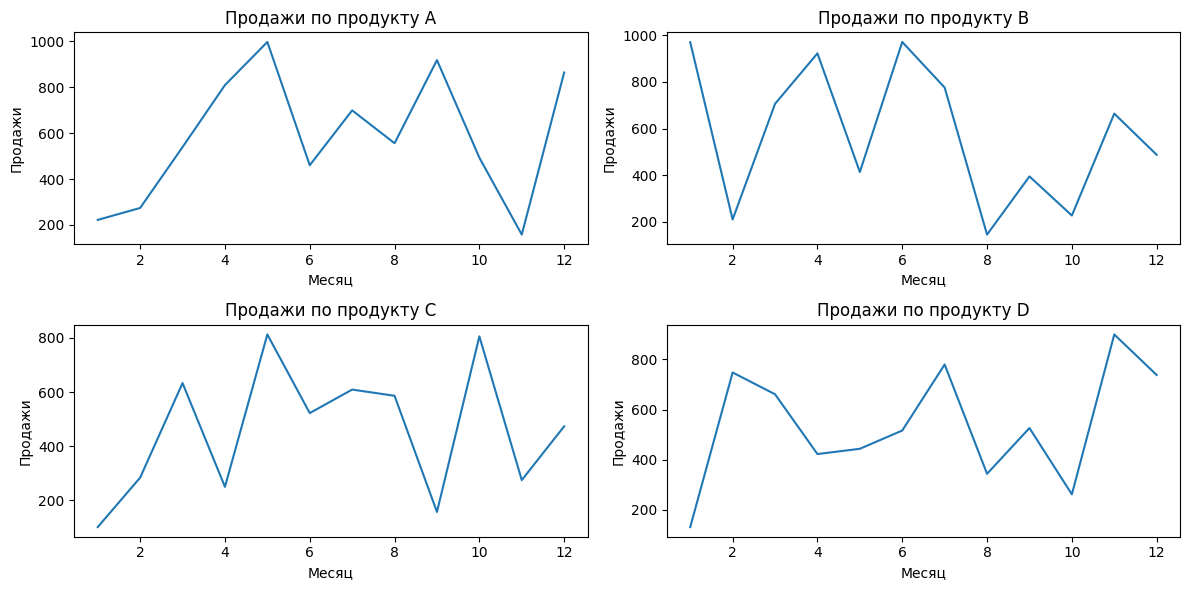

,month,product,sales
0,1,A,222
1,2,A,274
2,3,A,539
3,4,A,809
4,5,A,997


In [21]:
# 4) 4 графика
plt.figure(figsize=(12,6))

for i, p in enumerate(products, 1):
    subset = df[df["product"] == p]
    plt.subplot(2, 2, i)
    plt.plot(subset["month"], subset["sales"])
    plt.title(f"Продажи по продукту {p}")
    plt.xlabel("Месяц")
    plt.ylabel("Продажи")

plt.tight_layout()
plt.show()

df.head()